# **👑DATA SCHOOL PROJECT11**  
**┗ 온라인 화장품 Funnel분석**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 온라인 화장품 Funnel분석
```  

> **프로젝트유형**

```
▶ 온라인 화장품 구매이력 데이터 활용 Funnel 분석

```

> **학습목표**

```
▶ 온라인 화장품 구매 과정에서의 사용자 행동 패턴 인식
▶ Funnel 단계별 dropout 지점 및 이유 파악
▶ 효과적인 마케팅 및 개선 전략 제안을 위한 데이터 분석 능력 향상
```

> **예상 결과물**

```
▶ Funnel 분석 리포트 (각 단계별 이탈률, 주요 이탈 원인 등)
▶ 화장품 구매 전환률 개선을 위한 전략 및 제안서
▶ 데이터 시각화 대시보드 (예: Tableau, Power BI 등을 사용한 대시보드)
```


## **문제상황 Introduction**
---
> **시나리오**

```
화장품 브랜드 "GlowUp"는 최근 온라인 매출이 예상보다 증가하지 않는다는 문제점을 발견했다. "GlowUp"의 마케팅 팀은 웹사이트 방문자들이 어디에서 가장 많이 이탈하는지,
그리고 어떤 화장품 항목이 높은 장바구니 포기율을 보이는지 파악하기 위해 Funnel 분석을 실시하기로 결정했다. 온라인 스토어의 데이터를 분석한 결과, 대부분의 고객들은
상품 검색 및 상품 페이지 조회 단계까지는 문제없이 진행되지만, 장바구니 담기와 결제 진행 단계에서 큰 이탈이 발생함을 확인할 수 있었다. 특히 특정 화장품 카테고리에서의
이탈률이 두드러짐을 발견하게 되었다. "GlowUp"의 마케팅 팀은 이러한 분석 결과를 바탕으로 장바구니 포기율을 줄이기 위한 다양한 전략을 모색하기 시작했다. 첫 번째로
고려하는 전략은 결제 프로세스의 간소화와, 장바구니 페이지에서의 추가 혜택 제공이었다. 또한, 이탈률이 높았던 특정 화장품 카테고리에 대한 프로모션 및 리뷰 캠페인도
진행하기로 결정했다. 이러한 Funnel 분석을 통해 "GlowUp"은 고객들의 온라인 구매 경험을 개선하고, 전환율을 높이는 방안을 찾아나가기 시작했다.
```  

> **문제정의**

```
▶ 온라인 쇼핑몰 구매 여정 중 이탈로 인한 매출 감소
```  

> **기대효과**

```
▶ 온라인 쇼핑몰 구매 전환율 개선
```

> **해결방안**

```
▶ Funnel 분석을 통해 각 단계별 이탈율과 주요 이탈 원인 파악
▶ 이탈율이 가장 높은 카테고리 파악
▶ 이탈 원인을 해결할 수 있는 방안 수립
```

> **성과측정**  

```
▶ 구매 전환율의 증가
▶ 매출 증대
```

> **데이터 살펴보기**


|Column|Description|
|:---|:---|
|event_time|이벤트가 발생한 시간|
|event_type|이벤트 유형: [view, cart, remove_from_cart, purchase] 중 하나|
|product_id|제품 ID|
|category_id|제품 카테고리 ID|
|category_code|의미 있는 카테고리 이름 (있는 경우)|
|brand|브랜드 이름 (소문자로, 있을 경우)|
|price|제품 가격|
|user_id|영구 사용자 ID|
|user_session|사용자 세션 ID|




In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/제로베이스/제로베이스_개인프로젝트/11_화장품_Funnel분석')
os.getcwd()

'/content/drive/MyDrive/제로베이스/제로베이스_개인프로젝트/11_화장품_Funnel분석'

In [3]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('P_PJT11_DATA.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


---

# 데이터셋 파악

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [5]:
df.describe()

,product_id,category_id,price,user_id
count,3.533286e+06,3.533286e+06,3.533286e+06,3.533286e+06
mean,5.473054e+06,1.555023e+18,8.871856e+00,5.223318e+08
std,1.331331e+06,1.689262e+17,1.986474e+01,8.494819e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.180452e+06
25%,5.726191e+06,1.487580e+18,2.060000e+00,4.866830e+08
50%,5.811429e+06,1.487580e+18,4.210000e+00,5.566496e+08
75%,5.859462e+06,1.487580e+18,7.140000e+00,5.828019e+08
max,5.917178e+06,2.235524e+18,3.277800e+02,5.954145e+08


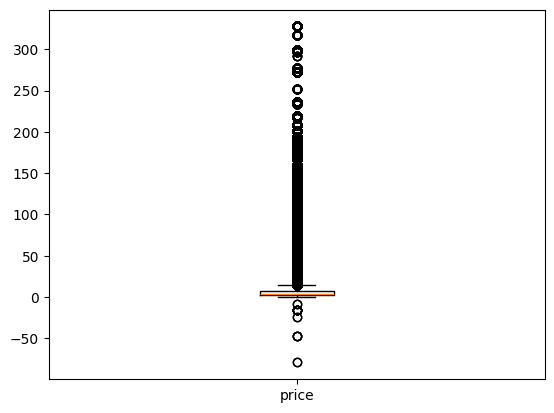

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams['font.family'] = 'NanumGothic'

plt.boxplot(df['price'])
plt.xticks([1], ['price'])
plt.show()

In [ ]:
df['event_type'].unique()

array(['remove_from_cart', 'view', 'cart', 'purchase'], dtype=object)

price의 min값이 음수인 것은 환불된 건일 수도 있으므로, 일단 삭제하지 않기

In [ ]:
df['category_id'].nunique()

482

In [ ]:
df['brand'].nunique()

252

In [6]:
df.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,3474821
brand,1510289
price,0
user_id,0
user_session,779


In [9]:
df['category_code'].isnull().sum() / df.shape[0] * 100

98.34530802205086

In [10]:
df['brand'].isnull().sum() / df.shape[0] * 100

42.74460091823872

전체 데이터 중 98%가 'category_code'에 결측치, 42%가 'brand'에 결측치 가짐

하지만 category_id에는 결측치가 없으므로 카테고리에 대한 분석을 수행할 수 있음

brand별 이탈율 분석 시에는 brand 결측치를 제거 후 수행하기

---

# 기본 지표 조사

In [11]:
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554


In [37]:
df['month'] = pd.to_datetime(df['event_time']).dt.month
df['month'].unique()

array([12], dtype=int32)

In [40]:
df['week'] = pd.to_datetime(df['event_time']).dt.isocalendar().week
df['week'].unique()

<IntegerArray>
[48, 49, 50, 51, 52, 1]
Length: 6, dtype: UInt32

In [41]:
df['event_time'].max()

'2019-12-31 23:59:57 UTC'

In [42]:
df['event_time'].min()

'2019-12-01 00:00:00 UTC'

In [46]:
df.loc[df['week'] == 1, 'week'] = 52

In [48]:
df.loc[df['week'] == 48, 'week'] = 1
df.loc[df['week'] == 49, 'week'] = 2
df.loc[df['week'] == 50, 'week'] = 3
df.loc[df['week'] == 51, 'week'] = 4
df.loc[df['week'] == 52, 'week'] = 5

## 가장 많이 판매된 카테고리 TOP 10

In [15]:
top_sold_categories = df[df['event_type']=='purchase']['category_id'].value_counts().head(10)
top_sold_categories

,count
category_id,
1487580007675986893,15919
1487580006317032337,7811
1487580005595612013,6937
1487580005092295511,6687
1487580005671109489,6011
1602943681873052386,5945
1487580009286598681,5790
1487580005268456287,4860
1487580005754995573,4648


## 판매된 상품의 브랜드별 매출 순위 + 평균 판매가

In [16]:
sales_per_brand = df[df['event_type']=='purchase'].groupby('brand', as_index=False)['price'].sum()
mean_per_brand = df[df['event_type']=='purchase'].groupby('brand', as_index=False)['price'].mean()
mean_per_brand.columns = ['brand', 'mean price']
sales_per_brand = pd.merge(sales_per_brand, mean_per_brand, how='left', on='brand')

top_sales_brands = sales_per_brand.sort_values(by='price', ascending=False)
top_sales_brands = top_sales_brands.reset_index(drop=True)

In [17]:
top_sales_brands.head(10)

,brand,price,mean price
0,runail,58177.26,3.196728
1,grattol,43793.50,5.359626
2,irisk,35291.51,3.334736
3,uno,29084.76,10.462144
4,estel,24474.19,5.946110
5,jessnail,24075.00,13.206253
6,strong,22266.41,185.553417
7,masura,19809.19,2.835961
8,cnd,19378.92,14.918337
9,ingarden,18938.21,4.555740


---

# 단계별 이탈율 조사

In [19]:
all_events = df['event_type'].value_counts().reset_index()
all_events

,event_type,count
0,view,1728331
1,cart,927124
2,remove_from_cart,664655
3,purchase,213176


## 카테고리별 + 단계별 이탈율

In [ ]:
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554


In [22]:
cate_events = df.groupby(['category_id', 'event_type']).size().unstack().fillna(0)
cate_events.head()

event_type,cart,purchase,remove_from_cart,view
category_id,,,,
1487580004807082827,3.0,0.0,0.0,23.0
1487580004832248652,2385.0,469.0,2814.0,4431.0
1487580004857414477,2571.0,468.0,2631.0,4789.0
1487580004882580302,2886.0,616.0,2396.0,3948.0
1487580004916134735,9322.0,2191.0,10883.0,13474.0


In [23]:
cate_events['bounce_rate_view_cart'] = (1 - (cate_events['cart'] / cate_events['view'])) * 100
cate_events['bounce_rate_cart_purchase'] = (1 - (cate_events['purchase'] / cate_events['cart'])) * 100
cate_events['conversion_rate'] = (cate_events['purchase'] / cate_events['view']) * 100

In [24]:
cate_events.head()

event_type,cart,purchase,remove_from_cart,view,bounce_rate_view_cart,bounce_rate_cart_purchase,conversion_rate
category_id,,,,,,,
1487580004807082827,3.0,0.0,0.0,23.0,86.956522,100.000000,0.000000
1487580004832248652,2385.0,469.0,2814.0,4431.0,46.174678,80.335430,10.584518
1487580004857414477,2571.0,468.0,2631.0,4789.0,46.314471,81.796966,9.772395
1487580004882580302,2886.0,616.0,2396.0,3948.0,26.899696,78.655579,15.602837
1487580004916134735,9322.0,2191.0,10883.0,13474.0,30.814903,76.496460,16.260947


In [58]:
cate_events.sort_values(by='conversion_rate', ascending=False)

event_type,cart,purchase,remove_from_cart,view,bounce_rate_view_cart,bounce_rate_cart_purchase,conversion_rate
category_id,,,,,,,
1487580011476025461,200.0,96.0,151.0,125.0,-60.000000,52.000000,76.800000
1487580009622143014,863.0,199.0,422.0,285.0,-202.807018,76.940904,69.824561
1487580007592100809,1524.0,545.0,1223.0,795.0,-91.698113,64.238845,68.553459
1487580010821714008,2909.0,889.0,2245.0,1699.0,-71.218364,69.439670,52.324897
2055161088059638328,1712.0,680.0,1228.0,1351.0,-26.720947,60.280374,50.333087
...,...,...,...,...,...,...,...
1819693959081886239,0.0,0.0,0.0,2.0,100.000000,NaN,0.000000
1805953965678920077,2.0,0.0,1.0,8.0,75.000000,100.000000,0.000000
1805953852441101266,0.0,0.0,0.0,3.0,100.000000,NaN,0.000000


In [25]:
conversion_categories = cate_events[cate_events['view'] >= 10].sort_values(by='conversion_rate', ascending=False)
conversion_categories = conversion_categories.fillna(0)

In [26]:
category_mean_price = df.groupby('category_id', as_index=False)['price'].mean()

In [27]:
conversion_categories = pd.merge(conversion_categories, category_mean_price, how='left', on='category_id')

In [28]:
conversion_categories.head()

,category_id,cart,purchase,remove_from_cart,view,bounce_rate_view_cart,bounce_rate_cart_purchase,conversion_rate,price
0,1487580011476025461,200.0,96.0,151.0,125.0,-60.000000,52.000000,76.800000,0.790000
1,1487580009622143014,863.0,199.0,422.0,285.0,-202.807018,76.940904,69.824561,0.780888
2,1487580007592100809,1524.0,545.0,1223.0,795.0,-91.698113,64.238845,68.553459,0.494221
3,1487580010821714008,2909.0,889.0,2245.0,1699.0,-71.218364,69.439670,52.324897,0.834557
4,2055161088059638328,1712.0,680.0,1228.0,1351.0,-26.720947,60.280374,50.333087,1.752064


In [57]:
conversion_categories.sort_values(by = 'conversion_rate', ascending=False)

,category_id,cart,purchase,remove_from_cart,view,bounce_rate_view_cart,bounce_rate_cart_purchase,conversion_rate,price
0,1487580011476025461,200.0,96.0,151.0,125.0,-60.000000,52.000000,76.800000,0.790000
1,1487580009622143014,863.0,199.0,422.0,285.0,-202.807018,76.940904,69.824561,0.780888
2,1487580007592100809,1524.0,545.0,1223.0,795.0,-91.698113,64.238845,68.553459,0.494221
3,1487580010821714008,2909.0,889.0,2245.0,1699.0,-71.218364,69.439670,52.324897,0.834557
4,2055161088059638328,1712.0,680.0,1228.0,1351.0,-26.720947,60.280374,50.333087,1.752064
...,...,...,...,...,...,...,...,...,...
401,1543705961326182546,0.0,0.0,0.0,10.0,100.000000,0.000000,0.000000,3.970000
402,1487580008221246441,0.0,0.0,0.0,14.0,100.000000,0.000000,0.000000,13.741429
403,1487580006895846315,0.0,0.0,2.0,26.0,100.000000,0.000000,0.000000,4.857143
404,1487580009798303788,0.0,0.0,0.0,12.0,100.000000,0.000000,0.000000,12.085000


## 브랜드별 + 단계별 이탈율

In [29]:
events_brand = df.groupby(['brand', 'event_type']).size().unstack()
events_brand['bounce_rate_view_cart'] = (1 - (events_brand['cart'] / events_brand['view'])) * 100
events_brand['bounce_rate_cart_purchase'] = (1 - (events_brand['purchase'] / events_brand['cart'])) * 100
events_brand['conversion_rate'] = (events_brand['purchase'] / events_brand['view']) * 100

conversion_brands = events_brand[events_brand['view'] >= 10].sort_values(by='conversion_rate', ascending=False)
conversion_brands = conversion_brands.fillna(0)

brand_mean_price = df.groupby('brand', as_index=False)['price'].mean()
conversion_brands = pd.merge(conversion_brands, brand_mean_price, how='left', on='brand')

In [30]:
conversion_brands.head()

,brand,cart,purchase,remove_from_cart,view,bounce_rate_view_cart,bounce_rate_cart_purchase,conversion_rate,price
0,eunyul,858.0,224.0,446.0,411.0,-108.759124,73.892774,54.501217,1.494141
1,dermal,645.0,112.0,454.0,268.0,-140.671642,82.635659,41.791045,1.435335
2,elskin,538.0,136.0,255.0,332.0,-62.048193,74.721190,40.963855,1.902466
3,supertan,209.0,37.0,54.0,100.0,-109.000000,82.296651,37.000000,0.968800
4,soleo,970.0,172.0,230.0,487.0,-99.178645,82.268041,35.318275,0.861372


---
# 시계열 이탈율 조사

## 주차별 전환율

In [50]:
weekly_event = df.groupby(['week', 'event_type']).size().unstack().fillna(0)
weekly_event['conversion_rate'] = weekly_event['purchase'] / weekly_event['view'] * 100
weekly_event.head()

event_type,cart,purchase,remove_from_cart,view,conversion_rate
week,,,,,
1,34525,7236,26290,59528,12.155624
2,240925,53435,171265,423569,12.615418
3,246593,58727,184106,451474,13.007837
4,212460,50609,151199,405181,12.490467
5,192621,43169,131795,388579,11.109453


## 시간대별 이탈율

In [ ]:
df.head(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc


In [31]:
df['hour'] = df['event_time'].astype(str).str[11:13]
hourly_event = df.groupby(['hour', 'event_type']).size().unstack().fillna(0)
hourly_event['conversion_rate'] = hourly_event['purchase'] / hourly_event['view'] * 100

## 요일별 이탈율

In [32]:
df['weekday'] = pd.to_datetime(df['event_time']).dt.day_name()
weekday_event = df.groupby(['weekday', 'event_type']).size().unstack().fillna(0)
weekday_event['conversion_rate'] = weekday_event['purchase']/weekday_event['view']*100

In [33]:
weekday_event.sort_index()

event_type,cart,purchase,remove_from_cart,view,conversion_rate
weekday,,,,,
Friday,109317,26193,79267,207380,12.630437
Monday,160771,37171,113770,298728,12.443092
Saturday,103731,22450,75069,198011,11.337754
Sunday,145614,30429,106383,270075,11.266870
Thursday,123283,30220,87621,232540,12.995614
Tuesday,148210,34463,106856,267752,12.871239
Wednesday,136198,32250,95689,253845,12.704603


In [34]:
weekday_event = weekday_event.sort_values(by='conversion_rate', ascending=False)
weekday_event

event_type,cart,purchase,remove_from_cart,view,conversion_rate
weekday,,,,,
Thursday,123283,30220,87621,232540,12.995614
Tuesday,148210,34463,106856,267752,12.871239
Wednesday,136198,32250,95689,253845,12.704603
Friday,109317,26193,79267,207380,12.630437
Monday,160771,37171,113770,298728,12.443092
Saturday,103731,22450,75069,198011,11.337754
Sunday,145614,30429,106383,270075,11.266870


## 전환율이 가장 높은 시간대 (11시) 행동 패턴 분석

In [ ]:
df_hour = df[df['hour'] == '11']
df_hour['event_time'] = pd.to_datetime(df_hour['event_time'])
data_sorted = df_hour.sort_values(['user_session', 'event_time'])

data_sorted['event_sequence'] = data_sorted.groupby(['user_session'])['event_type'].transform(lambda x: '->'.join(x))
data_sorted.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,event_sequence
2938058,2019-12-24 11:51:11+00:00,view,5864626,1487580007675986893,NaN,bpw.style,1.27,591745098,00011b89-8220-4794-b653-f1eab289404d,11,view->view->cart->view->view->view->cart->view...
2938137,2019-12-24 11:51:56+00:00,view,5619863,1487580005134238553,NaN,runail,2.86,591745098,00011b89-8220-4794-b653-f1eab289404d,11,view->view->cart->view->view->view->cart->view...
2938190,2019-12-24 11:52:26+00:00,cart,5619863,1487580005134238553,NaN,runail,2.86,591745098,00011b89-8220-4794-b653-f1eab289404d,11,view->view->cart->view->view->view->cart->view...
2938221,2019-12-24 11:52:38+00:00,view,5699811,1487580004882580302,NaN,NaN,2.70,591745098,00011b89-8220-4794-b653-f1eab289404d,11,view->view->cart->view->view->view->cart->view...
2938332,2019-12-24 11:53:42+00:00,view,5723490,1487580005134238553,NaN,runail,2.62,591745098,00011b89-8220-4794-b653-f1eab289404d,11,view->view->cart->view->view->view->cart->view...


In [ ]:
user_patterns = data_sorted.drop_duplicates(['user_session'])['event_sequence'].value_counts()
user_patterns = user_patterns.reset_index()
user_patterns

,event_sequence,count
0,view,36562
1,view->view,3691
2,view->view->view,1435
3,view->cart,1341
4,cart,966
...,...,...
5894,view->remove_from_cart->remove_from_cart->remo...,1
5895,remove_from_cart->remove_from_cart->remove_fro...,1
5896,view->view->view->view->view->cart->cart->cart...,1
5897,cart->cart->view->remove_from_cart->remove_fro...,1


## view로 끝나는 패턴

In [ ]:
# view로 끝나는 패턴
user_patterns_endswithview = user_patterns[user_patterns['event_sequence'].str.endswith('->view')]
user_patterns_endswithview = user_patterns_endswithview.reset_index(drop=True)

In [ ]:
user_patterns_endswithview.head(20)

,event_sequence,count
0,view->view,3691
1,view->view->view,1435
2,view->view->view->view,686
3,view->view->view->view->view,356
4,view->view->view->view->view->view,219
5,cart->view,197
6,view->cart->view,181
7,view->view->view->view->view->view->view,151
8,view->view->view->view->view->view->view->view,85
9,view->view->view->view->view->view->view->view...,73


## remove_from_cart를 포함하는 패턴

In [ ]:
user_patterns_rmfromcart = user_patterns[user_patterns['event_sequence'].str.contains('->remove_from_cart')]

In [ ]:
user_patterns_rmfromcart = user_patterns_rmfromcart.reset_index(drop=True)
user_patterns_rmfromcart.head(10)

,event_sequence,count
0,remove_from_cart->remove_from_cart,162
1,view->remove_from_cart,61
2,remove_from_cart->remove_from_cart->remove_fro...,61
3,remove_from_cart->remove_from_cart->remove_fro...,55
4,view->cart->remove_from_cart,52
5,view->remove_from_cart->remove_from_cart,51
6,view->cart->cart->remove_from_cart,43
7,cart->remove_from_cart->remove_from_cart,39
8,remove_from_cart->remove_from_cart->view,34
9,cart->remove_from_cart,31


## Purchase를 포함하는 패턴

In [ ]:
user_patterns_purchase = user_patterns[user_patterns['event_sequence'].str.contains('->purchase')]
user_patterns_purchase = user_patterns_purchase.reset_index(drop=True)
user_patterns_purchase.head(20)

,event_sequence,count
0,purchase->purchase,50
1,purchase->purchase->purchase->purchase,38
2,view->cart->purchase,37
3,purchase->purchase->purchase,36
4,purchase->purchase->purchase->purchase->purcha...,29
5,purchase->purchase->purchase->purchase->purchase,27
6,purchase->purchase->purchase->purchase->purcha...,21
7,cart->cart->purchase->purchase,18
8,purchase->purchase->purchase->purchase->purcha...,17
9,purchase->purchase->purchase->purchase->purcha...,17


---

# 결과

## 카테고리별/브랜드별로 살펴본 전환율과 가격 간의 상관관계

In [ ]:
conversion_categories.head(1)

,category_id,cart,purchase,remove_from_cart,view,bounce_rate_view_cart,bounce_rate_cart_purchase,conversion_rate,price
0,1487580011476025461,200.0,96.0,151.0,125.0,-60.0,52.0,76.8,0.79


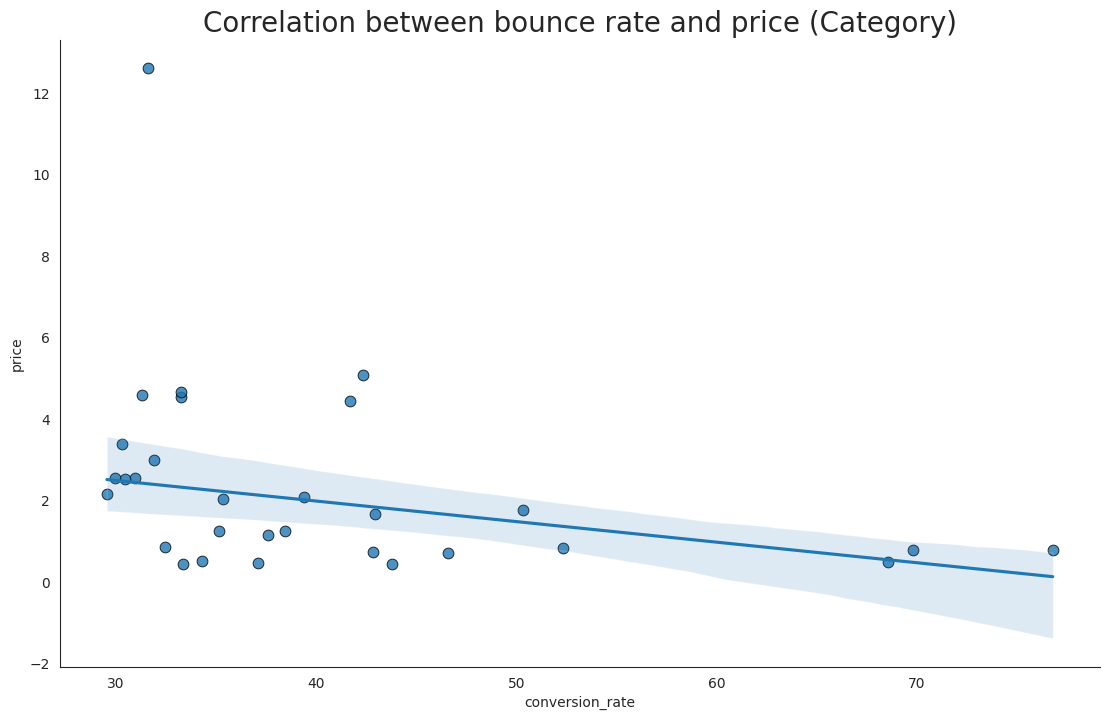

In [ ]:
import seaborn as sns

sns.set_style("white")
gridobj = sns.lmplot(x="conversion_rate", y="price", data=conversion_categories.head(30),
                     height=7, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

#gridobj.set(xlim=(0, 100), ylim=(0, 50))
plt.title("Correlation between bounce rate and price (Category)", fontsize=20)
plt.show()

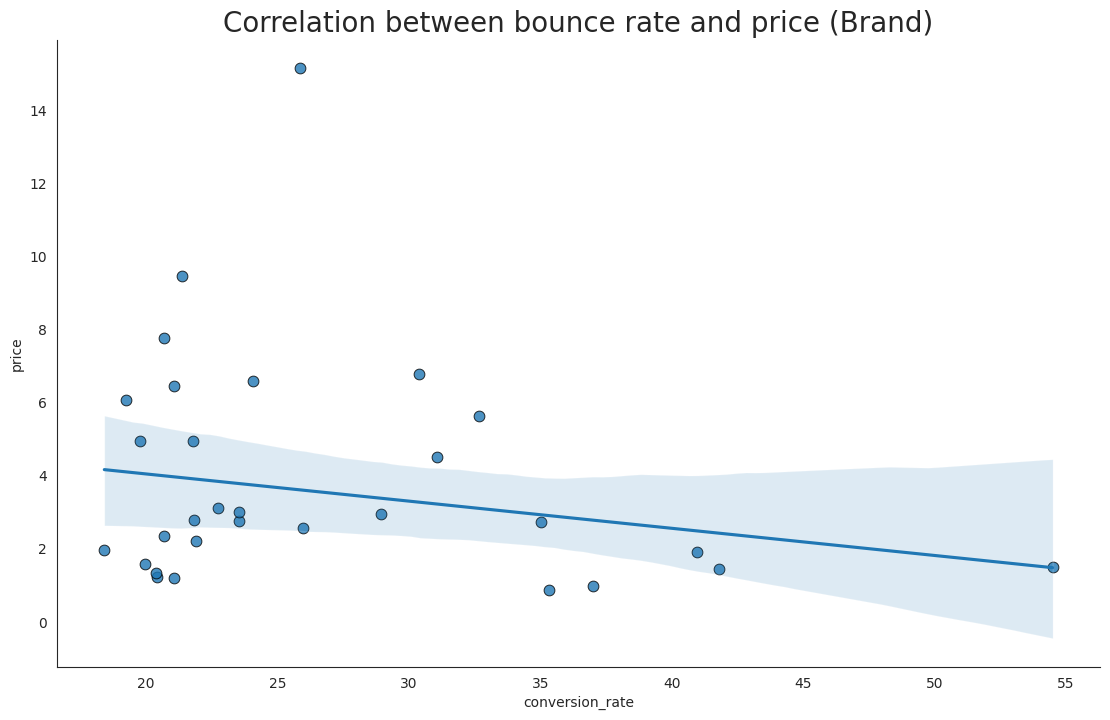

In [ ]:
sns.set_style("white")
gridobj = sns.lmplot(x="conversion_rate", y="price", data=conversion_brands.head(30),
                     height=7, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

#gridobj.set(xlim=(0, 100), ylim=(0, 50))
plt.title("Correlation between bounce rate and price (Brand)", fontsize=20)
plt.show()



```
➡ 눈에 띄는 변화는 부족하지만, 비교적 가격이 낮을 수록 전환율이 증가하는 추세를 보입니다.
```



## 전환율이 가장 낮은 카테고리 TOP 10

In [ ]:
conversion_categories.sort_values(by='conversion_rate', ascending=True).head(10)

,category_id,cart,purchase,remove_from_cart,view,bounce_rate_view_cart,bounce_rate_cart_purchase,conversion_rate,price
425,1487580004807082827,3.0,0.0,0.0,23.0,86.956522,100.0,0.0,9.450000
403,1487580006895846315,0.0,0.0,2.0,26.0,100.000000,0.0,0.0,4.857143
402,1487580008221246441,0.0,0.0,0.0,14.0,100.000000,0.0,0.0,13.741429
401,1543705961326182546,0.0,0.0,0.0,10.0,100.000000,0.0,0.0,3.970000
400,1487580006174425994,0.0,0.0,2.0,18.0,100.000000,0.0,0.0,71.133500
399,1487580005570446188,0.0,0.0,0.0,14.0,100.000000,0.0,0.0,7.920000
398,1487580006199591819,7.0,0.0,28.0,16.0,56.250000,100.0,0.0,3.330000
397,1487580006484804506,0.0,0.0,4.0,60.0,100.000000,0.0,0.0,7.575312
396,1487580005318787937,6.0,0.0,8.0,40.0,85.000000,100.0,0.0,9.000741
395,1487580006845514665,0.0,0.0,0.0,11.0,100.000000,0.0,0.0,10.118182




```
전환율이 가장 낮은 카테고리 10개는 위 표와 같습니다.

➡ 특히, view에서 cart로 이동할 때의 이탈율이 가장 높은 것으로 파악됩니다.
```



## 구매가 가장 활발한 요일 및 시간대
#### = 전환율이 가장 높을 때

> 요일별

In [51]:
styled_weekly_event = weekly_event.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
styled_weekly_event

event_type,cart,purchase,remove_from_cart,view,conversion_rate
week,,,,,
1,34525,7236,26290,59528,12.155624
2,240925,53435,171265,423569,12.615418
3,246593,58727,184106,451474,13.007837
4,212460,50609,151199,405181,12.490467
5,192621,43169,131795,388579,11.109453


In [ ]:
styled_weekday_event = weekday_event.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
styled_weekday_event

event_type,cart,purchase,remove_from_cart,view,conversion_rate
weekday,,,,,
Thursday,123283,30220,87621,232540,12.995614
Tuesday,148210,34463,106856,267752,12.871239
Wednesday,136198,32250,95689,253845,12.704603
Friday,109317,26193,79267,207380,12.630437
Monday,160771,37171,113770,298728,12.443092
Saturday,103731,22450,75069,198011,11.337754
Sunday,145614,30429,106383,270075,11.266870


> 시간대별

In [ ]:
styled_hourly_event = hourly_event.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
styled_hourly_event

event_type,cart,purchase,remove_from_cart,view,conversion_rate
hour,,,,,
00,9948,2003,6916,17823,11.238288
01,8514,1648,6318,14194,11.610540
02,9861,1995,6496,15270,13.064833
03,12576,2734,9237,21451,12.745327
04,18002,3321,13390,32463,10.230108
05,27936,6068,19822,48661,12.469945
06,35209,8496,26277,65981,12.876434
07,41389,10871,29712,79501,13.674042
08,46343,11884,33522,88832,13.378062




```
(1) 주로 평일과 낮 시간대에 구매 전환율이 높아지는 것을 알 수 있습니다.

(2) 주말과 저녁 시간대에 구매 전환율이 낮아지는 것을 알 수 있습니다.

(3) 저녁 시간대에 하강하던 전환율은 오후 10시 ~ 오전 3시 사이에 잠시 반등합니다.
```



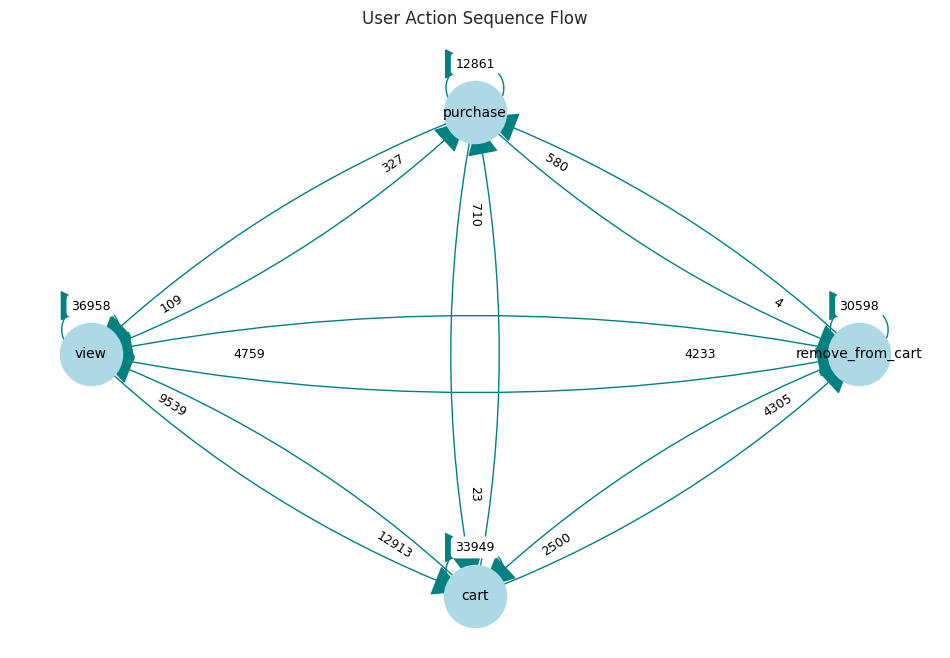

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for _, row in user_patterns.iterrows():
  actions = row['event_sequence'].split('->')
  count = row['count']

  for i in range(len(actions)-1):
    source = actions[i]
    target = actions[i+1]

    if G.has_edge(source,target):
      G[source][target]['weight'] += count
    else:
      G.add_edge(source,target,weight=count)

plt.figure(figsize=(12, 8))
pos = nx.shell_layout(G)  # 노드 위치 자동 배치

# 노드, 간선, 라벨 그리기
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', connectionstyle="arc3,rad=0.1",
                       arrowsize=50, edge_color='teal', width=1)

# 노드 레이블 추가
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# 간선 레이블 (weight) 추가
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.8, rotate=True)

plt.title("User Action Sequence Flow")
plt.axis('off')
plt.show()



```
(1) 조회 후 바로 구매하기 보다는, 장바구니에 담은 후 구매하는 패턴이 더 많았습니다.

(2) 구매 후 바로 구매하는 패턴이 많은 것으로 보아, 새 제품에 대한 고민을 하지 않고 이미 알고 있던 제품이나 평소에 필요하던 제품을 주로 구매하는 것으로 추측됩니다.
```



---

# 앞으로 취할 수 있는 전략

(1) '카테고리별 이탈률 조사'에서, 전환율이 낮은 이유로 view->cart 단계의 이탈율이 높은 것으로 조사되었습니다. 이에 더불어, 구매로 이어지는 고객의 대다수가 장바구니 페이지에서 출발한 것으로 보아, **고객이 장바구니에 상품을 담도록 유도하는 전략이 필요합니다.**

(2) (1)에 이어서, **장바구니에서 고객의 실질적 구매로 이어질 수 있는 마케팅 전략(장바구니 쿠폰 등)이 필요합니다.**

(3) (1)에 이어서, 장바구니로 이동한 고객이 이탈하지 않고 **hooking될 수 있도록 페이지를 개선**하는 방향도 생각해볼 수 있습니다.

(4) 요일 및 시간대별 조사에 따라, 쇼핑몰의 주 고객층은 평일 점심시간대와 늦은 밤에 활발히 접속하는 **'직장인'** 으로 간주됩니다. 따라서, 타깃 고객을 **'직장인' 중에서도 어떤 특징을 가지고 있는 고객인지 조사하여 페르소나를 세부적으로 정의**할 수 있습니다.

(5) 주 고객층으로 예상되는 '직장인'의 퇴근 시간 후인 **평일 오후 10시 ~ 오전 3시 사이에 게릴라성 이벤트**를 열어 이목을 집중시킬 수 있는 전략을 제안합니다.

In [55]:
os.getcwd()

'/content/drive/MyDrive/제로베이스/제로베이스_개인프로젝트/11_화장품_Funnel분석'

In [56]:
df.to_csv('df.csv')

weekly_event.to_csv('weekly_event.csv')
hourly_event.to_csv('hourly_event.csv')
weekday_event.to_csv('weekday_event.csv')

all_events.to_csv('all_events.csv')
conversion_brands.to_csv('conversion_brands.csv')
conversion_categories.to_csv('conversion_categories.csv')